# Logistic Regression example
Using a Fish dataset we will predict the Species (target value) using given parameters of fish.

# Imports and reading data

In [145]:
# imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')

# for visualisation
import chart_studio.plotly as py
import plotly.graph_objs as go
import cufflinks as cf
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt

# setting up plotly
init_notebook_mode(connected=True)  # for notebooks
from plotly.offline import iplot
# For offline use
cf.go_offline()

# for machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [146]:
# defining a url for dataset which is on a Github repo
dataset_url = "https://raw.githubusercontent.com/harika-bonthu/02-linear-regression-fish/master/datasets_229906_491820_Fish.csv"

# reading data 
df = pd.read_csv(dataset_url)
df.shape
df.head()

Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340

In [147]:
# checking unique values of Target
print(df['Species'].unique())

# checking null values
df.isnull().sum()
     


['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

# Data Visualisation

In [148]:
df['Species'].iplot(kind='hist', colors='blue')


# Preparing Data for model

In [149]:
# defining features and target variables
X = df.iloc[:, 1:]
y = df.loc[:, 'Species']

<h3>Scaling input featrues using MinMaxScaler</h3>

In Min Max Scaler, the minimum of feature is made equal to zero and the maximum of feature equal to one. MinMax Scaler shrinks the data within the given range, usually of 0 to 1. It transforms data by scaling features to a given range.

In [150]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


<h3>Label encoding target variable</h3>

Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. 

In [151]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


<h3>Splitting into Train-Test</h3>

In [152]:
X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model coding

In [153]:
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
#Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm : lbfgs solver; good for small datasets

# training the model
clf.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

# Prediction

In [154]:
y_pred = clf.predict(X_test)

# Checking accuracy

In [155]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 81.25%


# Confusion Matrix
A confusion matrix is a matrix that summarizes the performance of a machine learning model on a set of test data. It is a means of displaying the number of accurate and inaccurate instances based on the model’s predictions.

The matrix displays the number of instances produced by the model on the test data.

- True positives (TP): occur when the model accurately predicts a positive data point.
- True negatives (TN): occur when the model accurately predicts a negative data point.
- True positives (FP): occur when the model predicts a positive data point incorrectly.
- False negatives (FN): occur when the model mispredicts a negative data point.

Text(0.5, 1.0, 'Confusion Matrix')

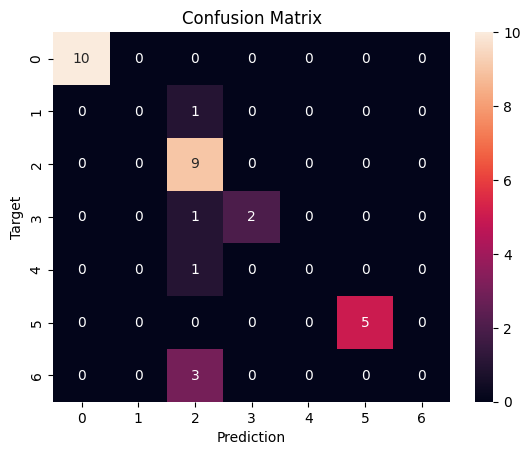

In [156]:
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [157]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.00      0.00      0.00         1
           2       0.60      1.00      0.75         9
           3       1.00      0.67      0.80         3
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         5
           6       0.00      0.00      0.00         3

    accuracy                           0.81        32
   macro avg       0.51      0.52      0.51        32
weighted avg       0.73      0.81      0.75        32



# Classification report explanation

- Precision: Percentage of correct positive predictions relative to total positive predictions.
- Recall: Percentage of correct positive predictions relative to total actual positives.
- F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.<br>
F1 Score: 2 * (Precision * Recall) / (Precision + Recall)

